In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import  files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
car=pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
car.isnull().sum()

In [ ]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car

In [ ]:
print(car.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [ ]:
car.dtypes=='object'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
min_max_scaler = MinMaxScaler()


for column in car.columns:
  column_type = car.dtypes[column]
  if column_type=='object':
    #print(column_type)
    le=LabelEncoder()
    car[column]=le.fit_transform(car[column])
    #print(car.dtypes[column])
  else:
     if column!='price':
        car[[column]]=min_max_scaler.fit_transform(car[[column]])


In [ ]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder=LabelEncoder()
#car['CarName']=labelencoder.fit_transform(car['CarName'])
#car['fueltype']=labelencoder.fit_transform(car['fueltype'])
#car['aspiration']=labelencoder.fit_transform(car['aspiration'])
#car['doornumber']=labelencoder.fit_transform(car['doornumber'])
#car['carbody']=labelencoder.fit_transform(car['carbody'])
#car['drivewheel']=labelencoder.fit_transform(car['drivewheel'])
#car['enginelocation']=labelencoder.fit_transform(car['enginelocation'])
#car['enginetype']=labelencoder.fit_transform(car['enginetype'])
#car['cylindernumber']=labelencoder.fit_transform(car['cylindernumber'])
#car['fuelsystem']=labelencoder.fit_transform(car['fuelsystem'])

In [ ]:
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,2,1,0,1,0,2,0,0.058309,0.413433,0.316667,0.083333,0.411171,0,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.004902,1.0,3,1,0,1,0,2,0,0.058309,0.413433,0.316667,0.083333,0.411171,0,2,0.260377,5,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.009804,0.6,1,1,0,1,2,2,0,0.230321,0.449254,0.433333,0.383333,0.517843,5,3,0.343396,5,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.014706,0.8,4,1,0,0,3,1,0,0.384840,0.529851,0.491667,0.541667,0.329325,3,2,0.181132,5,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.019608,0.8,5,1,0,0,3,0,0,0.373178,0.529851,0.508333,0.541667,0.518231,3,1,0.283019,5,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.980392,0.2,139,1,0,0,3,2,0,0.655977,0.711940,0.716667,0.641667,0.567882,3,2,0.301887,5,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,16845.0
201,0.985294,0.2,138,1,1,0,3,2,0,0.655977,0.711940,0.708333,0.641667,0.605508,3,2,0.301887,5,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,19045.0
202,0.990196,0.2,140,1,0,0,3,2,0,0.655977,0.711940,0.716667,0.641667,0.591156,5,3,0.422642,5,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,21485.0
203,0.995098,0.2,142,0,1,0,3,2,0,0.655977,0.711940,0.716667,0.641667,0.670675,3,3,0.316981,3,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


In [ ]:
car.shape

(205, 26)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#scale all values other than last column
#car.iloc[:,:-1]=min_max_scaler.fit_transform(car.iloc[:,:-1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from matplotlib import pyplot

In [ ]:
# split into input and output columns
X, Y = car.values[:, :-1], car.values[:, -1]
# split into train and test datasets
XX_train, X_test, YY_train, Y_test = train_test_split(X, Y, test_size=0.3)
# determine the number of input features
n_features = X.shape[1]
n_features

25

In [ ]:
# split into train and validation datasets
X_train, X_val, Y_train, Y_val = train_test_split(XX_train, YY_train, test_size=0.3)

#Now we have
# 50% of data in train set, 30% of data in test set, and 20% of data in validation set
print(len(X_train))
print(len(X_val))
print(len(X_test))

100
43
62


In [ ]:
# define model
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(n_features,)))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(6,activation='tanh'))
model.add(Dropout(0.01))
model.add(Dense(1,activation='relu'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

In [ ]:
# fit the model
history = model.fit(X_train, Y_train, epochs=500, batch_size=32, verbose=2, validation_data=(X_val,Y_val))
# predict test set

Epoch 1/500
4/4 - 1s - loss: 233552992.0000 - mse: 233552992.0000 - val_loss: 319438208.0000 - val_mse: 319438208.0000
Epoch 2/500
4/4 - 0s - loss: 233552368.0000 - mse: 233552368.0000 - val_loss: 319436480.0000 - val_mse: 319436480.0000
Epoch 3/500
4/4 - 0s - loss: 233550752.0000 - mse: 233550752.0000 - val_loss: 319433760.0000 - val_mse: 319433760.0000
Epoch 4/500
4/4 - 0s - loss: 233548240.0000 - mse: 233548240.0000 - val_loss: 319431136.0000 - val_mse: 319431136.0000
Epoch 5/500
4/4 - 0s - loss: 233545776.0000 - mse: 233545776.0000 - val_loss: 319428576.0000 - val_mse: 319428576.0000
Epoch 6/500
4/4 - 0s - loss: 233543600.0000 - mse: 233543600.0000 - val_loss: 319426048.0000 - val_mse: 319426048.0000
Epoch 7/500
4/4 - 0s - loss: 233540880.0000 - mse: 233540880.0000 - val_loss: 319423776.0000 - val_mse: 319423776.0000
Epoch 8/500
4/4 - 0s - loss: 233538464.0000 - mse: 233538464.0000 - val_loss: 319421696.0000 - val_mse: 319421696.0000
Epoch 9/500
4/4 - 0s - loss: 233536512.0000 - ms

In [ ]:
# predict test set
pred = model.predict(X_test)
# evaluate predictions
score = mean_squared_error(Y_test, pred)
print('MSE: %.3f' % score)

MSE: 194200695.141


In [ ]:
Y_test

In [ ]:
pred

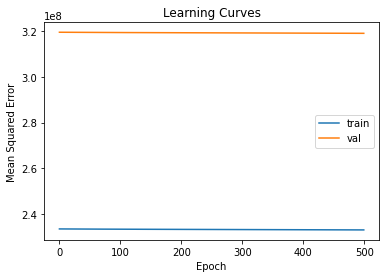

In [ ]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()